### Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

In [329]:
df1= pd.read_excel('Data_Train.xlsx')
df2= pd.read_excel('Test_set.xlsx')
df = pd.concat([df1,df2]).reset_index(drop=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df.tail())

Airline Date_of_Journey   Source Destination  \
13349  Air India          6/06/2019       Kolkata  Banglore     
13350  IndiGo             27/03/2019      Kolkata  Banglore     
13351  Jet Airways        6/03/2019       Delhi    Cochin       
13352  Air India          6/03/2019       Delhi    Cochin       
13353  Multiple carriers  15/06/2019      Delhi    Cochin       

                 Route Dep_Time  Arrival_Time Duration Total_Stops  \
13349  CCU → DEL → BLR  20:30    20:25 07 Jun  23h 55m  1 stop       
13350  CCU → BLR        14:20    16:55         2h 35m   non-stop     
13351  DEL → BOM → COK  21:50    04:25 07 Mar  6h 35m   1 stop       
13352  DEL → BOM → COK  04:00    19:15         15h 15m  1 stop       
13353  DEL → BOM → COK  04:55    19:15         14h 20m  1 stop       

      Additional_Info  Price  
13349  No info        NaN     
13350  No info        NaN     
13351  No info        NaN     
13352  No info        NaN     
13353  No info        NaN

In [330]:
df['Date'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y')
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year
df['Duration'] = df['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df['Flight_Charting'] = df['Source'] + ' to ' + df['Destination']
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Day'] = df['Date_of_Journey'].str.split('/').str[0]

In [331]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Weekday', 'Month', 'year',
       'Flight_Charting', 'Arrival_Hour', 'Dep_Hour', 'Day'],
      dtype='object')

In [332]:
df3 = df.drop(['Date_of_Journey','Source','Destination','Dep_Time','Date'],axis=1)

In [333]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Route            13353 non-null  object 
 2   Arrival_Time     13354 non-null  object 
 3   Duration         13354 non-null  int64  
 4   Total_Stops      13353 non-null  object 
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Weekday          13354 non-null  object 
 8   Month            13354 non-null  object 
 9   year             13354 non-null  int64  
 10  Flight_Charting  13354 non-null  object 
 11  Arrival_Hour     13354 non-null  object 
 12  Dep_Hour         13354 non-null  object 
 13  Day              13354 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.4+ MB


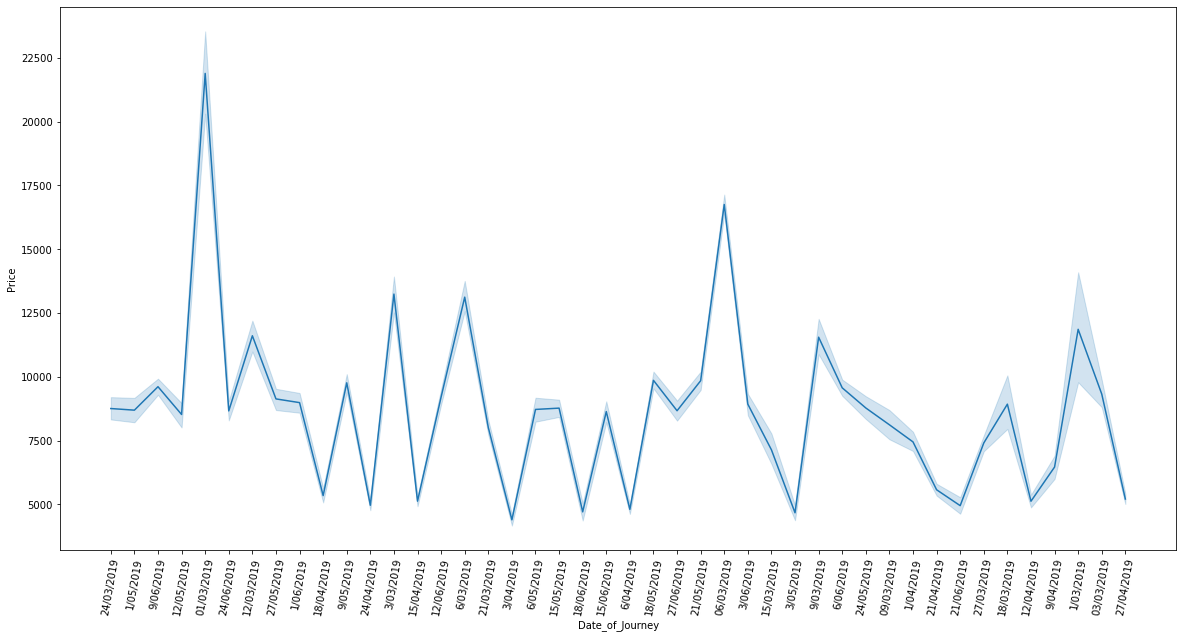

In [36]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Date_of_Journey", y="Price", data=df)
plt.xticks(rotation=80)
plt.show()

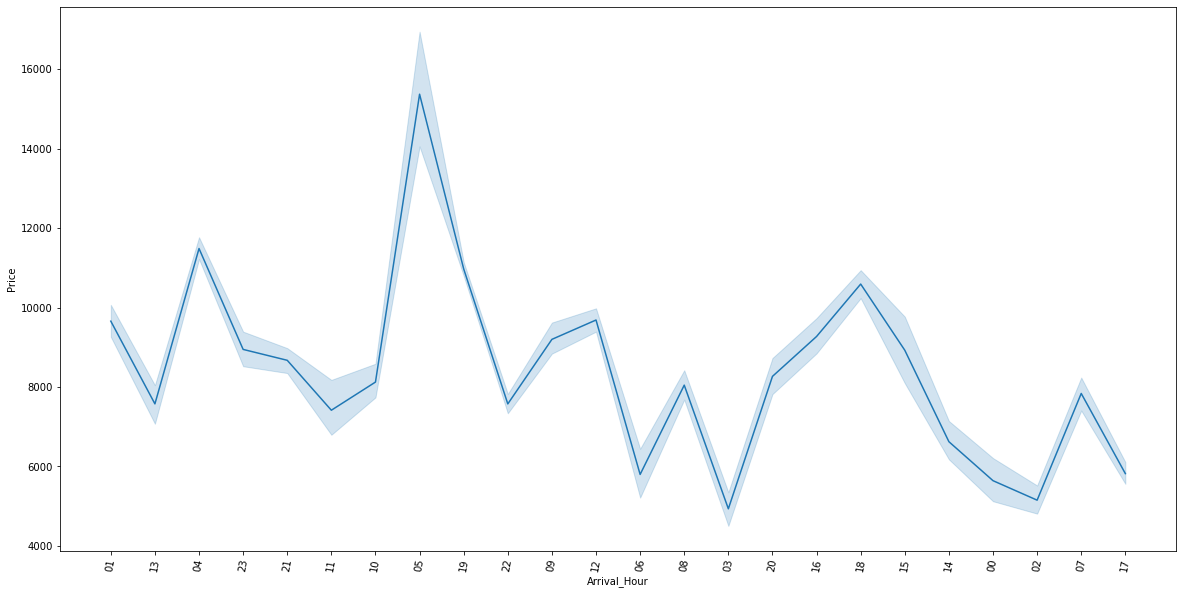

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Arrival_Hour", y="Price", data=df)
plt.xticks(rotation=80)
plt.show()

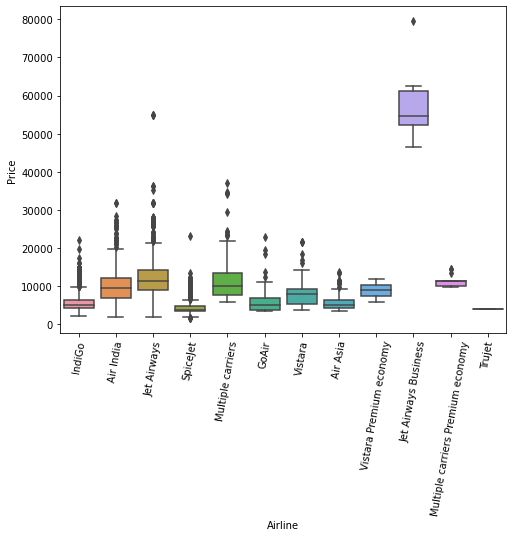

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Airline", y="Price", data=df)
plt.xticks(rotation=80)
plt.show()

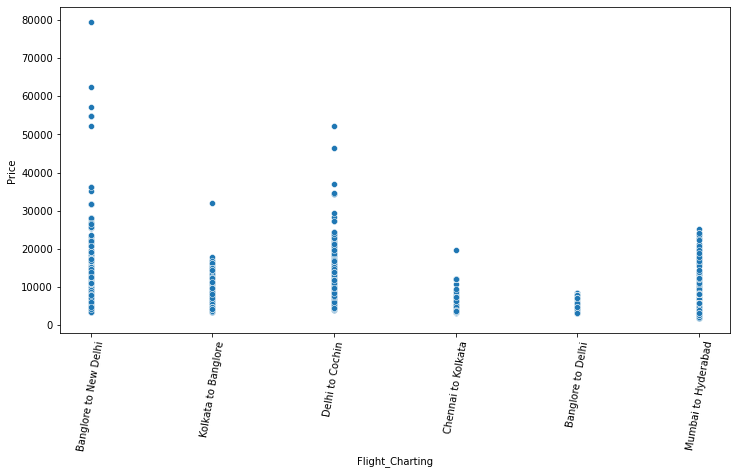

In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Flight_Charting", y="Price", data=df)
plt.xticks(rotation=80)
plt.show()

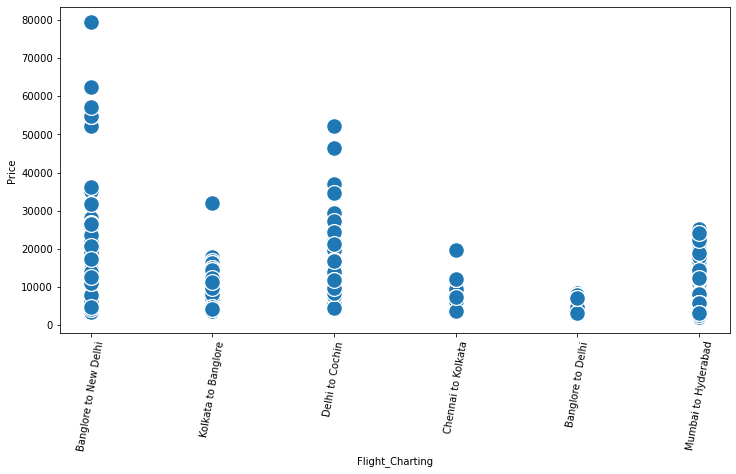

In [57]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Flight_Charting", y="Price", data=df,s=250)
plt.xticks(rotation=80)
plt.show()

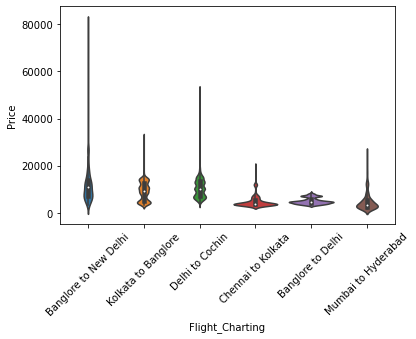

In [51]:
sns.violinplot(x='Flight_Charting',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()

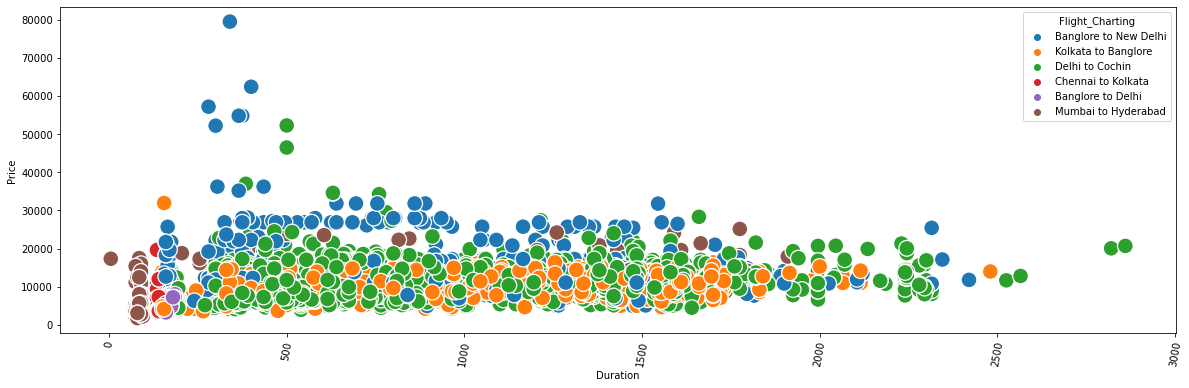

In [59]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="Duration", y="Price", hue='Flight_Charting',data=df,s=250)
plt.xticks(rotation=80)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Banglore to New Delhi'),
  Text(1, 0, 'Kolkata to Banglore'),
  Text(2, 0, 'Delhi to Cochin'),
  Text(3, 0, 'Chennai to Kolkata'),
  Text(4, 0, 'Banglore to Delhi'),
  Text(5, 0, 'Mumbai to Hyderabad')])

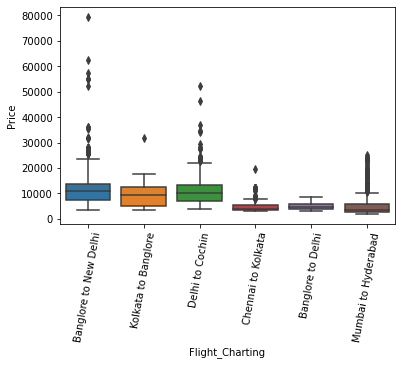

In [61]:
ax = sns.boxplot(x="Flight_Charting", y="Price", data=df3)
plt.xticks(rotation=80)

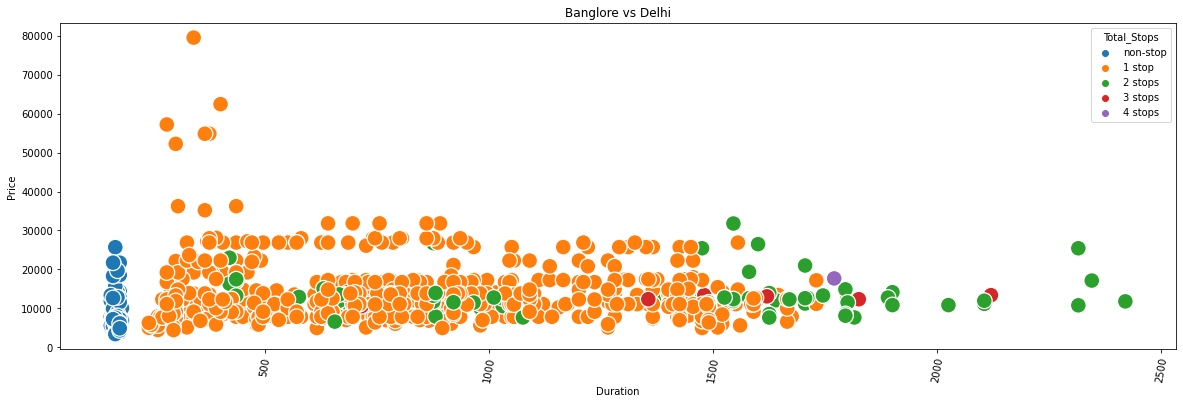

In [68]:
Banglore = df.loc[df['Flight_Charting'] == 'Banglore to New Delhi']
plt.figure(figsize=(20,6))
sns.scatterplot(x="Duration", y="Price", hue='Total_Stops',data=Banglore,s=250)
plt.xticks(rotation=80)
plt.title('Banglore vs Delhi')
plt.show()

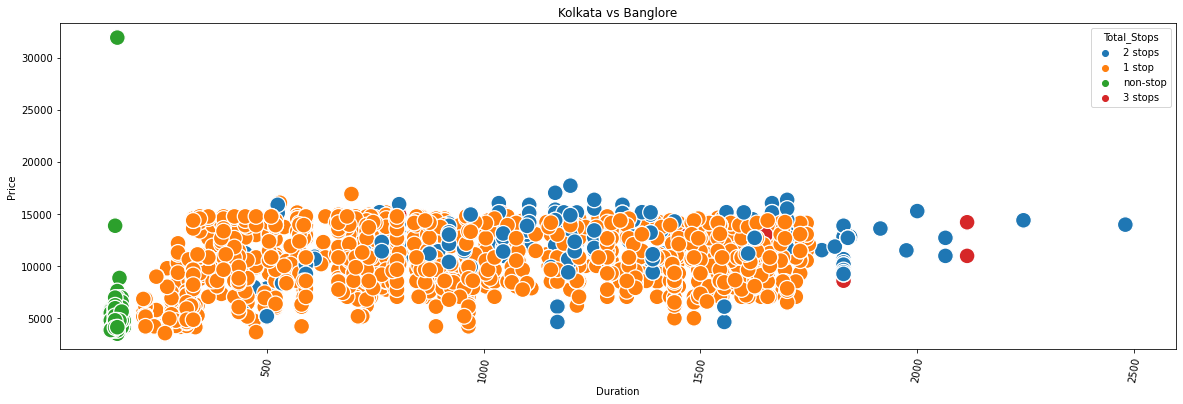

In [67]:
Kolkata = df.loc[df['Flight_Charting'] == 'Kolkata to Banglore']
plt.figure(figsize=(20,6))
sns.scatterplot(x="Duration", y="Price", hue='Total_Stops',data=Kolkata,s=250)
plt.xticks(rotation=80)
plt.title('Kolkata vs Banglore')
plt.show()

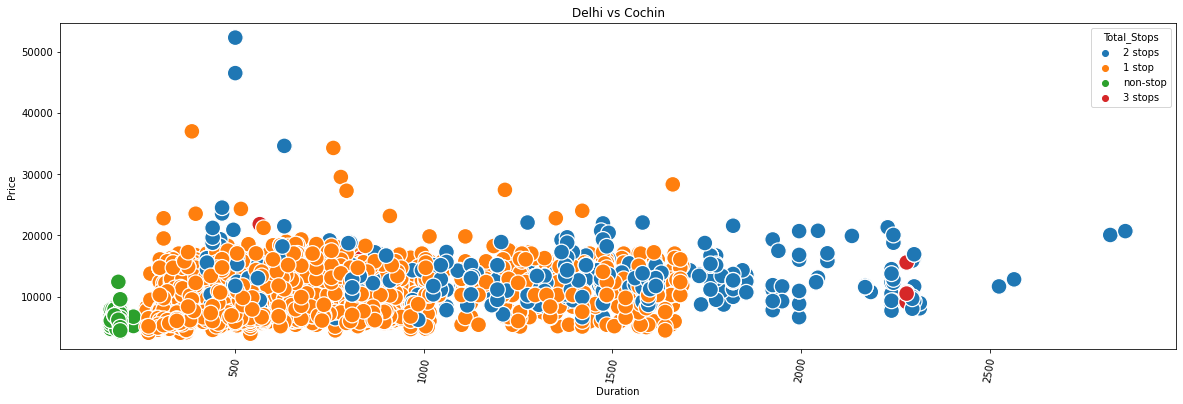

In [69]:
Delhi = df.loc[df['Flight_Charting'] == 'Delhi to Cochin']
plt.figure(figsize=(20,6))
sns.scatterplot(x="Duration", y="Price", hue='Total_Stops',data=Delhi,s=250)
plt.xticks(rotation=80)
plt.title('Delhi vs Cochin')
plt.show()

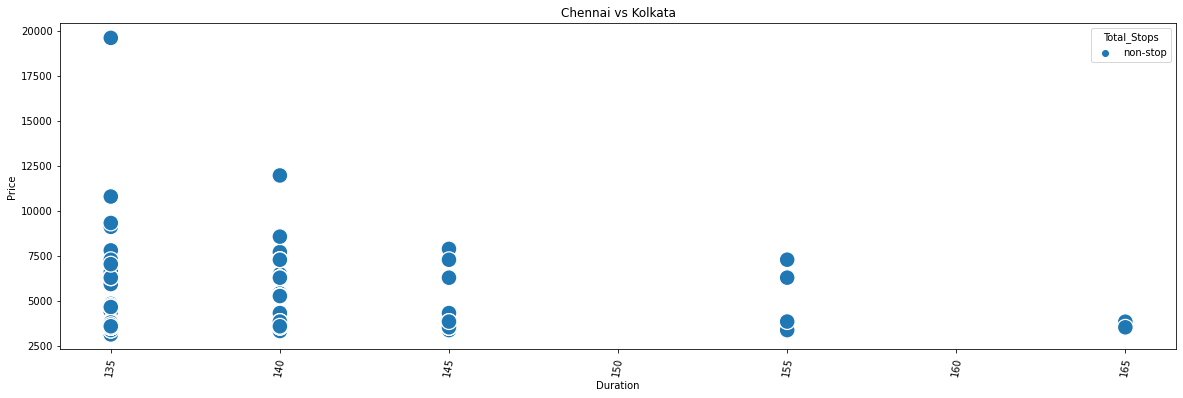

In [70]:
Chennai = df.loc[df['Flight_Charting'] == 'Chennai to Kolkata']
plt.figure(figsize=(20,6))
sns.scatterplot(x="Duration", y="Price", hue='Total_Stops',data=Chennai,s=250)
plt.xticks(rotation=80)
plt.title('Chennai vs Kolkata')
plt.show()

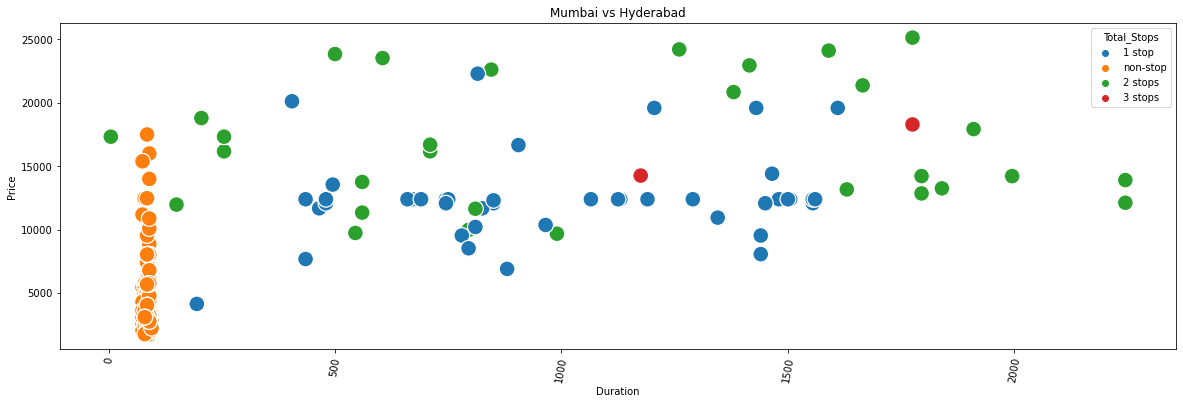

In [71]:
Mumbai = df.loc[df['Flight_Charting'] == 'Mumbai to Hyderabad']
plt.figure(figsize=(20,6))
sns.scatterplot(x="Duration", y="Price", hue='Total_Stops',data=Mumbai,s=250)
plt.xticks(rotation=80)
plt.title('Mumbai vs Hyderabad')
plt.show()

In [62]:
df['Flight_Charting'].unique()

array(['Banglore to New Delhi', 'Kolkata to Banglore', 'Delhi to Cochin',
       'Chennai to Kolkata', 'Banglore to Delhi', 'Mumbai to Hyderabad'],
      dtype=object)

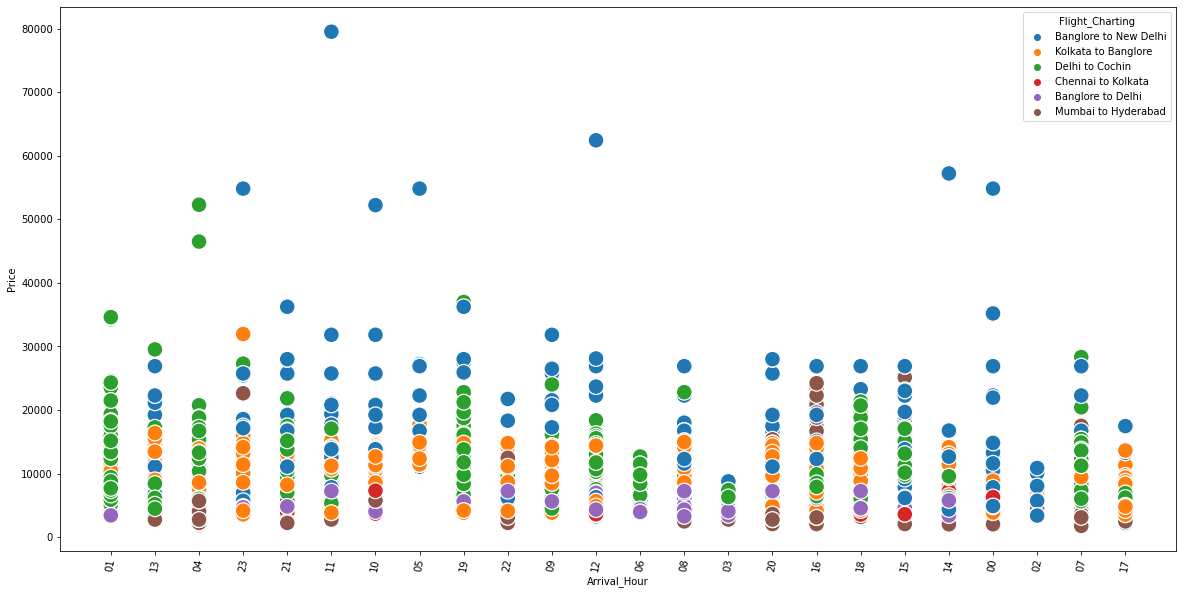

In [73]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Arrival_Hour", y="Price", hue='Flight_Charting',data=df,s=250)
plt.xticks(rotation=80)
plt.show()

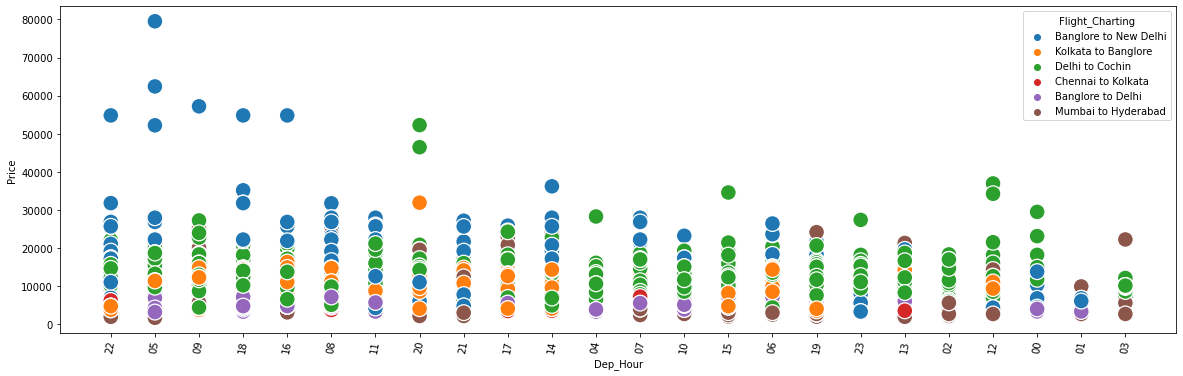

In [75]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="Dep_Hour", y="Price", hue='Flight_Charting',data=df,s=250)
plt.xticks(rotation=80)
plt.show()

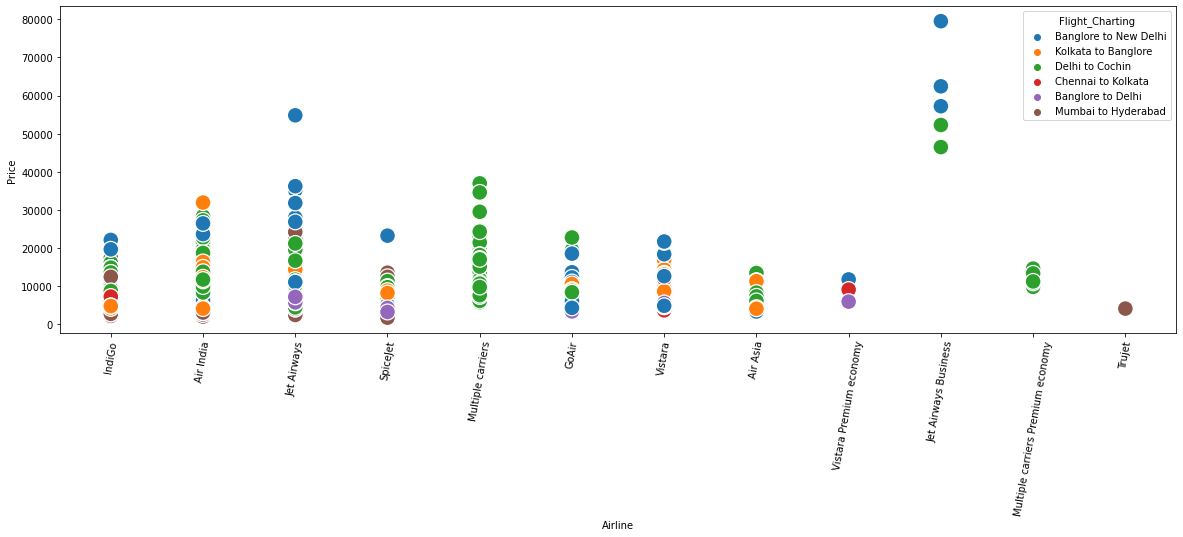

In [77]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="Airline", y="Price", hue='Flight_Charting',data=df,s=250)
plt.xticks(rotation=80)
plt.show()

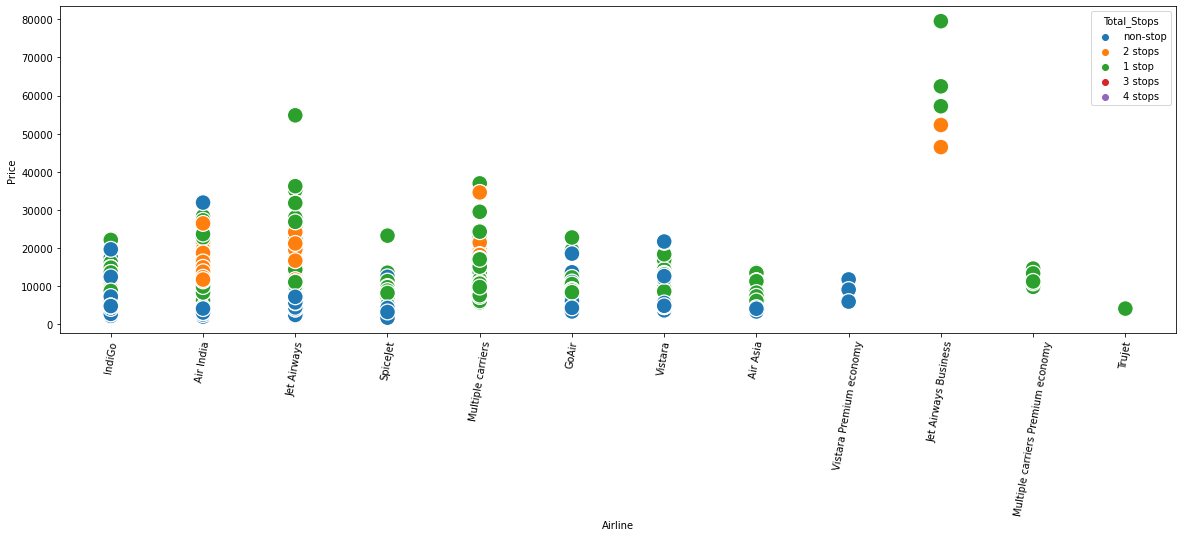

In [78]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="Airline", y="Price", hue='Total_Stops',data=df,s=250)
plt.xticks(rotation=80)
plt.show()

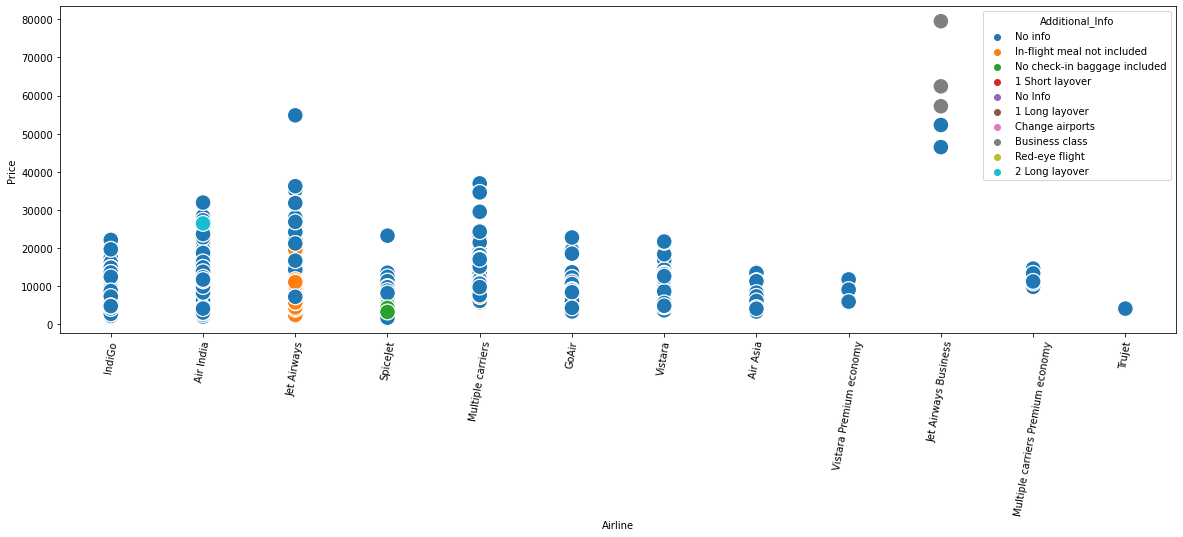

In [79]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="Airline", y="Price", hue='Additional_Info',data=df,s=250)
plt.xticks(rotation=80)
plt.show()

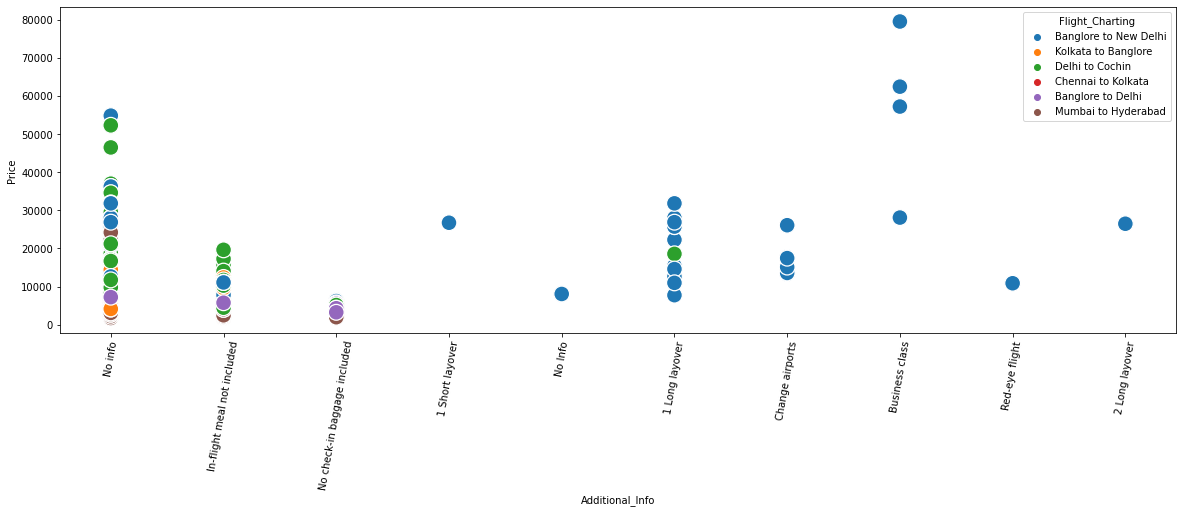

In [80]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="Additional_Info", y="Price",hue="Flight_Charting",data=df,s=250)
plt.xticks(rotation=80)
plt.show()

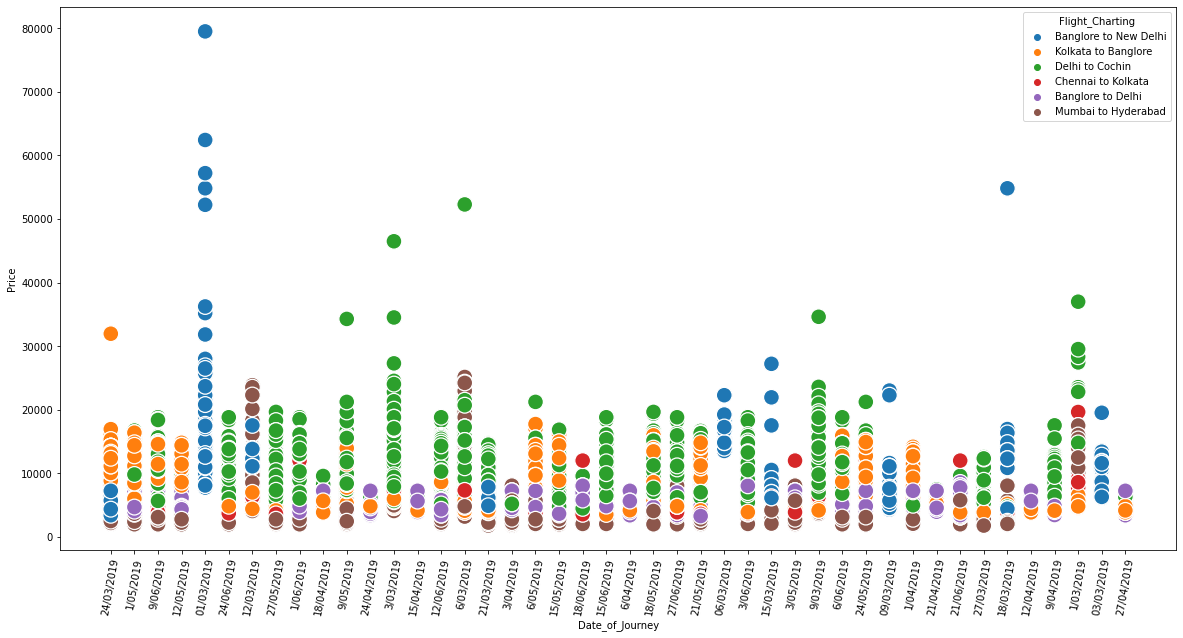

In [81]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Date_of_Journey", y="Price",hue="Flight_Charting",data=df,s=250)
plt.xticks(rotation=80)
plt.show()

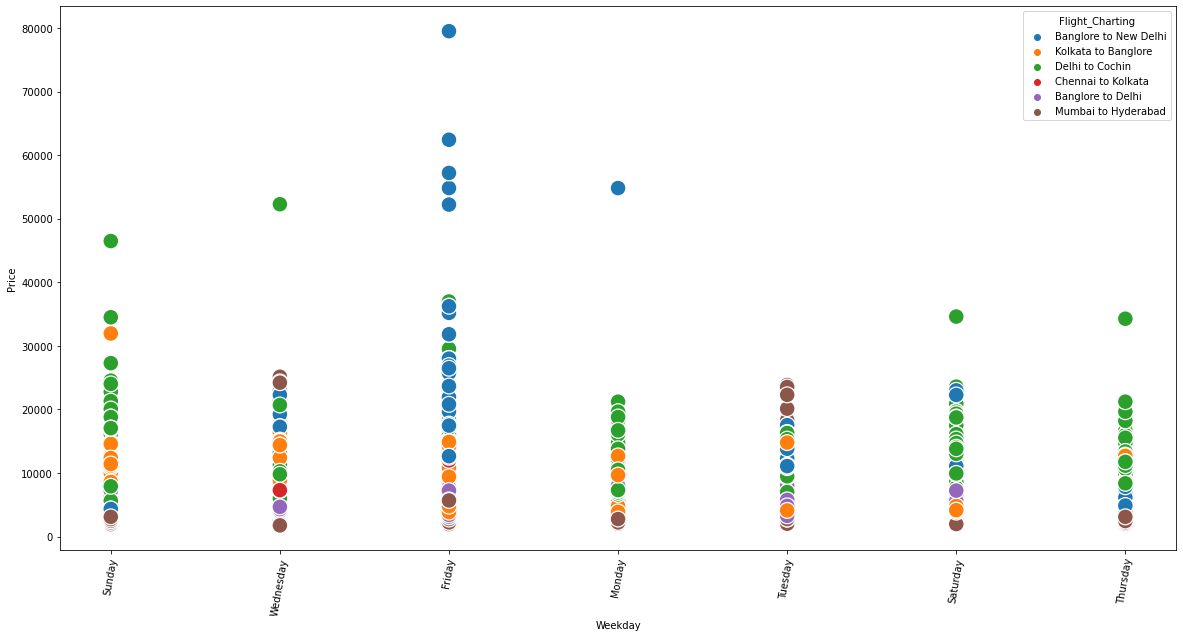

In [82]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Weekday", y="Price",hue="Flight_Charting",data=df,s=250)
plt.xticks(rotation=80)
plt.show()

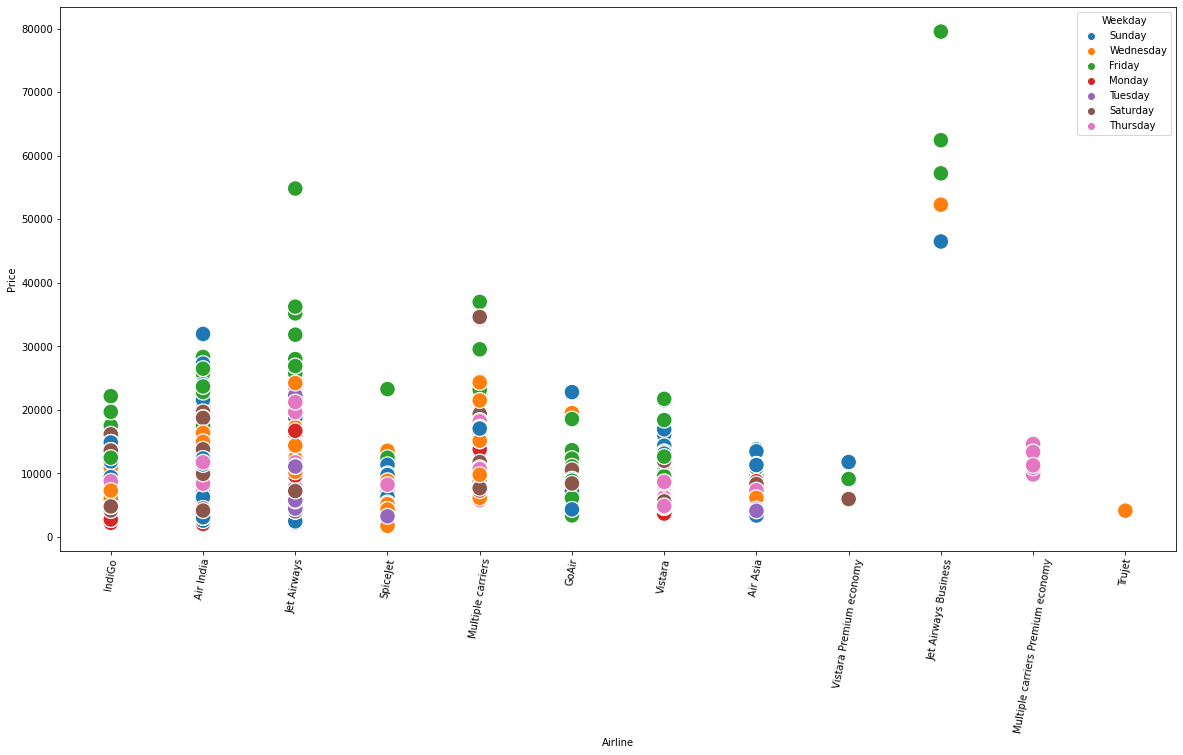

In [83]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Airline", y="Price",hue="Weekday",data=df,s=250)
plt.xticks(rotation=80)
plt.show()

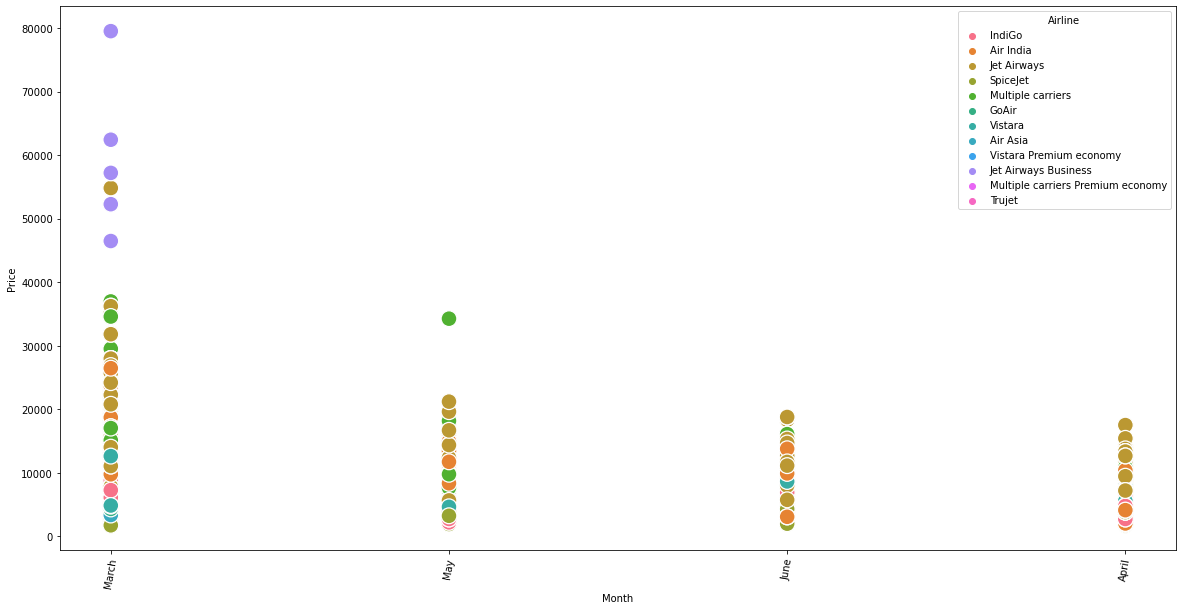

In [84]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Month", y="Price",hue="Airline",data=df,s=250)
plt.xticks(rotation=80)
plt.show()

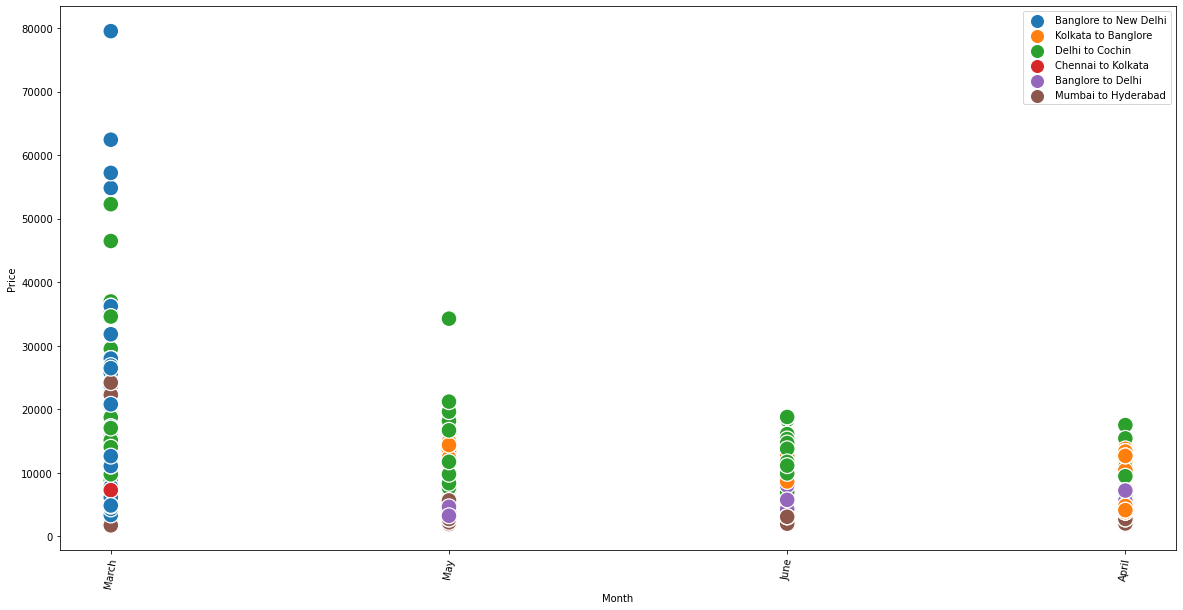

In [85]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Month", y="Price",hue="Flight_Charting",data=df,s=250)
plt.xticks(rotation=80)
plt.legend(markerscale=2)
plt.show()

In [86]:
df3.columns

Index(['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Year', 'Weekday', 'Month', 'year', 'Flight_Charting', 'Arrival_Hour',
       'Dep_Hour'],
      dtype='object')

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Duration         13354 non-null  int64  
 2   Total_Stops      13353 non-null  object 
 3   Additional_Info  13354 non-null  object 
 4   Price            10683 non-null  float64
 5   Year             13354 non-null  int32  
 6   Weekday          13354 non-null  object 
 7   Month            13354 non-null  object 
 8   year             13354 non-null  int64  
 9   Flight_Charting  13354 non-null  object 
 10  Arrival_Hour     13354 non-null  object 
 11  Dep_Hour         13354 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 1.2+ MB


In [334]:
df3.select_dtypes(exclude=['int']).columns

Index(['Airline', 'Route', 'Arrival_Time', 'Total_Stops', 'Additional_Info',
       'Price', 'Weekday', 'Month', 'Flight_Charting', 'Arrival_Hour',
       'Dep_Hour', 'Day'],
      dtype='object')

In [335]:
category = ['Airline', 'Route', 'Arrival_Time', 'Total_Stops', 'Additional_Info',
       'Price', 'Weekday', 'Month', 'Flight_Charting', 'Arrival_Hour',
       'Dep_Hour', 'Day']
lab = LabelEncoder()
for i in category:
    df3[i] = lab.fit_transform(df3[i])

print(df3.dtypes)

Airline            int32
Route              int32
Arrival_Time       int32
Duration           int64
Total_Stops        int32
Additional_Info    int32
Price              int64
Weekday            int32
Month              int32
year               int64
Flight_Charting    int32
Arrival_Hour       int32
Dep_Hour           int32
Day                int32
dtype: object


In [125]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          13354 non-null  int32
 1   Duration         13354 non-null  int64
 2   Total_Stops      13354 non-null  int32
 3   Additional_Info  13354 non-null  int32
 4   Price            13354 non-null  int64
 5   Year             13354 non-null  int32
 6   Weekday          13354 non-null  int32
 7   Month            13354 non-null  int32
 8   year             13354 non-null  int64
 9   Flight_Charting  13354 non-null  int32
 10  Arrival_Hour     13354 non-null  int32
 11  Dep_Hour         13354 non-null  int32
dtypes: int32(9), int64(3)
memory usage: 782.6 KB


In [336]:
z = np.abs(zscore(df3))
print(z)

        Airline     Route  Arrival_Time  Duration  Total_Stops  \
0      0.413335  1.553742  1.938184      0.932359  1.412498      
1      1.259391  0.249911  0.110027      0.389628  0.250177      
2      0.009693  1.164807  1.359465      0.982003  0.250177      
3      0.413335  0.459030  1.369592      0.626456  0.804402      
4      0.413335  1.266203  1.088743      0.705399  0.804402      
5      1.701806  0.272887  0.114085      0.981699  1.412498      
6      0.009693  1.893560  0.377913      0.567554  0.804402      
7      0.009693  1.893560  1.211949      1.228699  0.804402      
8      0.009693  1.893560  0.377913      1.751695  0.804402      
9      0.855750  0.798848  0.751157      0.340289  0.804402      
10     1.259391  0.772708  1.247607      0.301122  0.804402      
11     0.413335  0.272887  1.224912      0.961963  1.412498      
12     1.259391  1.400065  0.192296      1.001434  1.412498      
13     0.009693  0.220607  0.624719      0.172840  0.804402      
14     0.4

In [337]:
threshold = 3
print(np.where(z<3))
print(df3.shape)

(array([    0,     0,     0, ..., 13353, 13353, 13353], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(13354, 14)


In [338]:
df_new = df3[(z<3).all(axis = 1)]

In [339]:
X = df3.drop(['Price'],axis=1).iloc[:10683]
y = df3['Price'].iloc[:10683]

In [135]:
from sklearn.preprocessing import StandardScaler

In [340]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [373]:
df3.columns

Index(['Airline', 'Route', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Weekday', 'Month', 'year',
       'Flight_Charting', 'Arrival_Hour', 'Dep_Hour', 'Day'],
      dtype='object')

In [138]:
X.iloc[:10683].shape

(10683, 11)

In [356]:
tes = df3.iloc[10683:]

In [357]:
Test_data = tes.drop('Price',axis=1)

In [116]:
X.iloc[:10683].shape

(10683, 11)

In [117]:
y.iloc[10683:].shape

(2671,)

In [342]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.504203952991334
R2 score for the random state is 42 is 0.8500268075323207
R2 score for the random state is 42 is 0.6381940665988005
R2 score for the random state is 42 is 0.8762781103487076
R2 score for the random state is 42 is 0.7572681688771777
R2 score for the random state is 42 is 0.9178775539442112
R2 score for the random state is 42 is 0.9210940145370787
R2 score for the random state is 43 is 0.5000672191481823
R2 score for the random state is 43 is 0.8487563564801032
R2 score for the random state is 43 is 0.6946655912205859
R2 score for the random state is 43 is 0.8650870015036096
R2 score for the random state is 43 is 0.761515008980373
R2 score for the random state is 43 is 0.9118021723728718
R2 score for the random state is 43 is 0.917578943227645
R2 score for the random state is 44 is 0.5012646323389562
R2 score for the random state is 44 is 0.8403578617339986
R2 score for the random state is 44 is 0.6418759772850895
R2 score for the 

In [141]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [142]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [343]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=51,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=51, verbose=2)

In [344]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 560}

In [345]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=560, max_features='auto', min_samples_split=5,
                    n_estimators=800)

In [347]:
ETR = ExtraTreesRegressor(n_estimators=560,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=560,random_state=51)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 92.28591636222245


In [348]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  84.91207425114116
Mean squared Error:  24912.82277016102
Root Mean Absolute Error:  9.214774780272233


Text(0, 0.5, 'Predicted_Y')

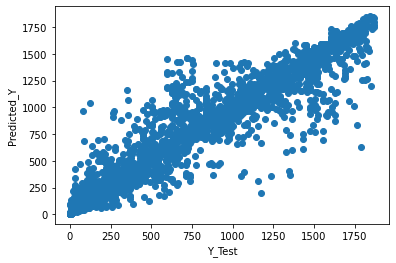

In [349]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [359]:
ETR = ExtraTreesRegressor(n_estimators=300,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=560,random_state=54)
ETR.fit(X_train,y_train)
pred = ETR.predict(Test_data)

In [374]:
pred

array([1143.50732011, 1140.6470172 , 1140.6470172 , ..., 1140.6470172 ,
       1217.44449735, 1143.50732011])

In [380]:
e = pd.DataFrame(pred)

In [174]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [175]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.48128190584231423
accuracy score correspond to random state  40 is 0.3258650028360749
accuracy score correspond to random state  41 is 0.47560975609756095
accuracy score correspond to random state  41 is 0.31764038570618264
accuracy score correspond to random state  42 is 0.47419171866137266
accuracy score correspond to random state  42 is 0.32501418037436186
accuracy score correspond to random state  43 is 0.4801474758933636
accuracy score correspond to random state  43 is 0.3179239931934203
accuracy score correspond to random state  44 is 0.47305728871242203
accuracy score correspond to random state  44 is 0.30998298355076576
accuracy score correspond to random state  45 is 0.4807146908678389
accuracy score correspond to random state  45 is 0.32671582529778787
accuracy score correspond to random state  46 is 0.47504254112308564
accuracy score correspond to random state  46 is 0.32558139534883723
accuracy score correspond to random st

In [366]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [367]:
dec = DecisionTreeClassifier(random_state=84)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [368]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=84), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [369]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=84)

In [370]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [371]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_leaf=5, random_state=84)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 48.21327283040272


In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_ros, test_size = 0.3, random_state = 12345)

In [373]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7478, 12), (3205, 12), (7478,), (3205,))

In [374]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [375]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
accuracy

0.30546021840873633

In [ ]:
file = open('ETR_flight_prediction.pkl', 'wb')
pkl.dump(ETR, file)